In [9]:

import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Lasso,Ridge,LassoCV,RidgeCV,ElasticNetCV,ElasticNet,LinearRegression
from sklearn.datasets import load_boston
from scipy.stats import ttest_ind,f_oneway,levene
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
%matplotlib inline
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
sc=StandardScaler()

In [2]:
stats.ttest_1samp
df=pd.read_csv('car_sales.csv',index_col=0)
df.shape


(93, 27)

In [3]:
df.corr()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
Min.Price,1.000000,0.970601,0.906756,-0.622875,-0.579966,0.645488,0.802444,-0.042598,-0.470395,0.635369,0.061236,0.553859,0.516758,0.492878,0.428603,0.376642,0.413485,0.666554
Price,0.970601,1.000000,0.981580,-0.594562,-0.560680,0.597425,0.788218,-0.004955,-0.426395,0.619480,0.057860,0.503628,0.500864,0.456028,0.392590,0.311499,0.366569,0.647179
Max.Price,0.906756,0.981580,1.000000,-0.547811,-0.522561,0.535012,0.744445,0.025015,-0.374024,0.581294,0.053216,0.442933,0.467501,0.408414,0.347785,0.247260,0.315315,0.605142
MPG.city,-0.622875,-0.594562,-0.547811,1.000000,0.943936,-0.710003,-0.672636,0.363045,0.695857,-0.813144,-0.416856,-0.666239,-0.667108,-0.720534,-0.666389,-0.384347,-0.494894,-0.843139
MPG.highway,-0.579966,-0.560680,-0.522561,0.943936,1.000000,-0.626795,-0.619044,0.313469,0.587497,-0.786039,-0.466386,-0.542897,-0.615384,-0.640359,-0.593683,-0.366684,-0.371629,-0.810658
EngineSize,0.645488,0.597425,0.535012,-0.710003,-0.626795,1.000000,0.732120,-0.547898,-0.824009,0.759306,0.372721,0.780283,0.732484,0.867110,0.778464,0.502750,0.680827,0.845075
Horsepower,0.802444,0.788218,0.744445,-0.672636,-0.619044,0.732120,1.000000,0.036688,-0.600314,0.711790,0.009264,0.550865,0.486854,0.644413,0.561216,0.256732,0.359217,0.738798
RPM,-0.042598,-0.004955,0.025015,0.363045,0.313469,-0.547898,0.036688,1.000000,0.494764,-0.333345,-0.467138,-0.441249,-0.467812,-0.539721,-0.505651,-0.342175,-0.524845,-0.427931
Rev.per.mile,-0.470395,-0.426395,-0.374024,0.695857,0.587497,-0.824009,-0.600314,0.494764,1.000000,-0.609710,-0.334976,-0.690233,-0.636824,-0.780460,-0.733160,-0.377010,-0.592792,-0.735264
Fuel.tank.capacity,0.635369,0.619480,0.581294,-0.813144,-0.786039,0.759306,0.711790,-0.333345,-0.609710,1.000000,0.472095,0.690461,0.757674,0.798719,0.671343,0.509689,0.613437,0.894018


In [3]:
df.drop(['Manufacturer','Model','Make'],axis=1,inplace=True)

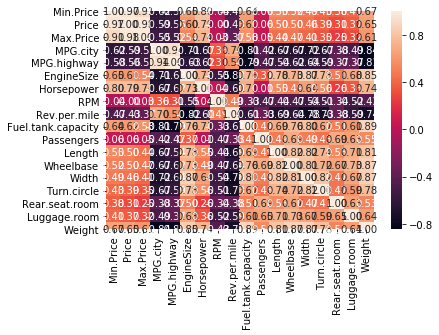

In [8]:

sns.heatmap(df.corr(),annot=True,fmt='.2f')
plt.show()

## 1) Origin coloumn 

#### Lets see if origin should be included or not 
#### in box plot column sjhould have Continous and by should have Origin
### Inference from scatter plot:-
#### visually when we see that the mean of these 2, whoch is the green line , are close to each other
#### but we need to proe this statistically:- 2 sample t test

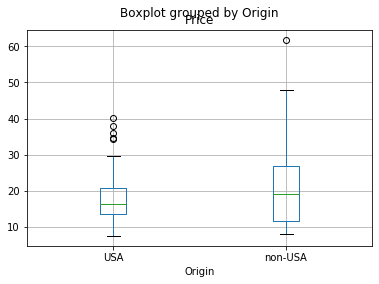

In [5]:
df.boxplot(column='Price',by='Origin')

##### statistically 2 sample t test

In [6]:
A_USA=df[df['Origin']=='USA']
A_ER=df[df['Origin']=='non-USA']
ttest_ind(A_USA['Price'],A_ER['Price'])

Ttest_indResult(statistic=-0.9655463914123011, pvalue=0.33683021808366587)

In [7]:
# print(np.mean(A_ER),np.mean(A_USA))

### Not significant as we have pvalue=0.33683021808366587 which is:-
#### 1) more than 0.05%, P(Ho being true is 33.6%)
#### 2) we accept null hypothesis
#### 3) mean price of usa brand equal to non usa
##### Hence origin doesnt matter

## 2) Type Column

In [8]:
df['Type'].value_counts()

Midsize    22
Small      21
Compact    16
Sporty     14
Large      11
Van         9
Name: Type, dtype: int64

In [9]:
#### Lets see if Type should be included or not 
#### but we need to proe this statistically:-  6 groups so f_oneway,

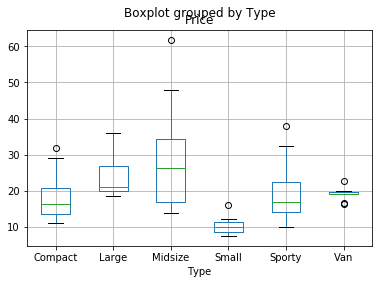

In [10]:
df.boxplot(column='Price',by='Type')

In [11]:
Compact=df[df['Type']=='Compact']
Large=df[df['Type']=='Large']
Midsize=df[df['Type']=='Midsize']
Small=df[df['Type']=='Small']
Sporty=df[df['Type']=='Sporty']
Van=df[df['Type']=='Van']
f_oneway(Van['Price'],Midsize['Price'],Small['Price'],Compact['Price'],Sporty['Price'],Large['Price'])

F_onewayResult(statistic=11.531617846935887, pvalue=1.4769990356644984e-08)

###  Significant as we have pvalue=1.4769990356644984e-08 which is:-
#### 1) less than 0.05%
#### 2) we reject null hypothesis
#### 3) mean price of all types are different
##### Hence origin doesnt matter
##### Hence Type  matter

In [12]:
df.corr()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
Min.Price,1.000000,0.970601,0.906756,-0.622875,-0.579966,0.645488,0.802444,-0.042598,-0.470395,0.635369,0.061236,0.553859,0.516758,0.492878,0.428603,0.376642,0.413485,0.666554
Price,0.970601,1.000000,0.981580,-0.594562,-0.560680,0.597425,0.788218,-0.004955,-0.426395,0.619480,0.057860,0.503628,0.500864,0.456028,0.392590,0.311499,0.366569,0.647179
Max.Price,0.906756,0.981580,1.000000,-0.547811,-0.522561,0.535012,0.744445,0.025015,-0.374024,0.581294,0.053216,0.442933,0.467501,0.408414,0.347785,0.247260,0.315315,0.605142
MPG.city,-0.622875,-0.594562,-0.547811,1.000000,0.943936,-0.710003,-0.672636,0.363045,0.695857,-0.813144,-0.416856,-0.666239,-0.667108,-0.720534,-0.666389,-0.384347,-0.494894,-0.843139
MPG.highway,-0.579966,-0.560680,-0.522561,0.943936,1.000000,-0.626795,-0.619044,0.313469,0.587497,-0.786039,-0.466386,-0.542897,-0.615384,-0.640359,-0.593683,-0.366684,-0.371629,-0.810658
EngineSize,0.645488,0.597425,0.535012,-0.710003,-0.626795,1.000000,0.732120,-0.547898,-0.824009,0.759306,0.372721,0.780283,0.732484,0.867110,0.778464,0.502750,0.680827,0.845075
Horsepower,0.802444,0.788218,0.744445,-0.672636,-0.619044,0.732120,1.000000,0.036688,-0.600314,0.711790,0.009264,0.550865,0.486854,0.644413,0.561216,0.256732,0.359217,0.738798
RPM,-0.042598,-0.004955,0.025015,0.363045,0.313469,-0.547898,0.036688,1.000000,0.494764,-0.333345,-0.467138,-0.441249,-0.467812,-0.539721,-0.505651,-0.342175,-0.524845,-0.427931
Rev.per.mile,-0.470395,-0.426395,-0.374024,0.695857,0.587497,-0.824009,-0.600314,0.494764,1.000000,-0.609710,-0.334976,-0.690233,-0.636824,-0.780460,-0.733160,-0.377010,-0.592792,-0.735264
Fuel.tank.capacity,0.635369,0.619480,0.581294,-0.813144,-0.786039,0.759306,0.711790,-0.333345,-0.609710,1.000000,0.472095,0.690461,0.757674,0.798719,0.671343,0.509689,0.613437,0.894018


In [13]:
#### 1)we can drop minprice and max price
#### 2) MPG.city,MPG.highway levene test
#### 3) RPM and Passenger, trick is go to least one,if any variable passing for this course all other variable/coeff  will automatically pass

In [4]:
df.drop(['Min.Price','Max.Price'],axis=1,inplace=True)


In [5]:
df.drop(['Origin'],axis=1,inplace=True)


## 3)Passenger Column
#### For Passenger we should do ANNOVA test (2 continous variable)
#### Statictically check for Passenger

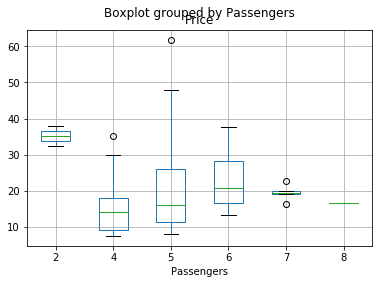

In [16]:
df.boxplot(column='Price',by='Passengers')

#### Inference from Box plot :-  There is significant difference bet mean , 
### Proving it statiscally

In [17]:
P1=df[df['Passengers']==2]
P2=df[df['Passengers']==4]
P3=df[df['Passengers']==5]
P4=df[df['Passengers']==6]
P6=df[df['Passengers']==7]
P5=df[df['Passengers']==8]
f_oneway(P1['Price'],P2['Price'],P3['Price'],P4['Price'],P5['Price'],P6['Price'])

F_onewayResult(statistic=2.6018557172397405, pvalue=0.030546276659861087)

In [18]:
#### Pvalue is less than 0.005, Reject ,Ho 

In [19]:
#### HO:-average price of P1...P5, HOLDS FALSE

## 4) RPM column
#### For Rpm we should do levene test (2 continous variable)
#### Statictically check for RPM

In [20]:

#levene(df['RPM'],df['Price'])

levene(df['Wheelbase'],df['Price'])
## HO->VARIANCE OF Wheelbase AND Price should be equal

LeveneResult(statistic=2.796101149756695, pvalue=0.09619342929244948)

## when to do Bartlett:-
## When we do not have any normal distribution for column go:-
### Step 1:- Go for Bartlett test(as it it will take care of skewness of the data(internally applies some log)
### Step 2:- Levene test (as it assumes that variable has normal distribution hence, and it gives the  probability of area under curve, which is pvalue)
## levene and bartlett are test of means
## Manwhitney:-unpaired
## WillCox:- For paired

In [21]:
# To know if your data is normally distributed
## Shapiro test :- Test of normality 
#### Ho :- Data is normal
### different ways to check normality:-
#### histogram (visually)
#### describe

In [22]:
print(np.var(df['Price']))
print(np.var(df['RPM']))
print('Hence proved that both variance are difeerent , reject Ho')

92.30130419701698
352259.7988206728
Hence proved that both variance are difeerent , reject Ho


In [23]:
#### 1) as pvalue=1.6713019431460332e-29 we reject the null hypothesis, CLEARS STATISCAL TEST
#### 2) Ho:- Variance of RPM=variance of Price,  
#### 3) we cannot drop RPM

In [24]:
## cONVERT CATEGORICALS
df.columns

Index(['Type', 'Price', 'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room',
       'Weight'],
      dtype='object')

## 5) AirBags Column

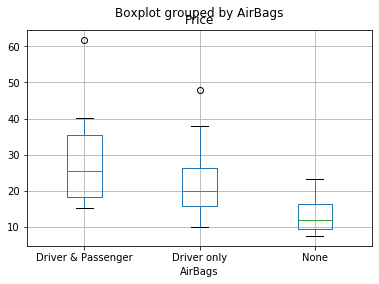

In [67]:
df.boxplot(column='Price',by='AirBags')

In [68]:
t1=df[df['AirBags']=='Driver & Passenger']
t2=df[df['AirBags']=='Driver only']
t3=df[df['AirBags']=='None']
f_oneway(t1['Price'],t2['Price'],t3['Price'])

F_onewayResult(statistic=21.177572370824052, pvalue=2.9011868198272466e-08)

In [69]:
### 1)As pvalue less than 0.005 , hence significant, Reject null hypothesis
### 2) Ho := Price of 'Driver & Passenger'= Driver= None 

## 5) DriveTrain

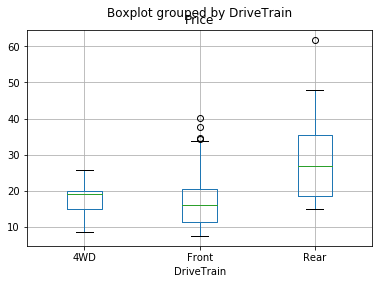

In [70]:
df.boxplot(column='Price',by='DriveTrain')

In [71]:
t1=df[df['DriveTrain']=='4WD']
t2=df[df['DriveTrain']=='Front']
t3=df[df['DriveTrain']=='Rear']
f_oneway(t1['Price'],t2['Price'],t3['Price'])

F_onewayResult(statistic=11.294939455410354, pvalue=4.201864877251638e-05)

In [72]:
### Passing the test

## 6) cylinders

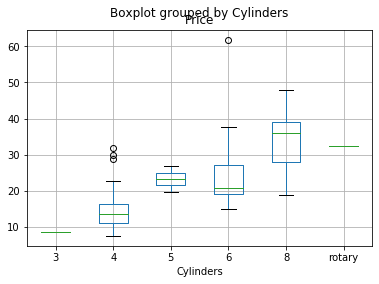

In [73]:
df.boxplot(column='Price',by='Cylinders')

In [74]:
t1 = df[df['Cylinders']=='4']['Price']
t2 = df[df['Cylinders']=='6']['Price']
t3 = df[df['Cylinders']=='8']['Price']
t4 = df[df['Cylinders']=='3']['Price']
t5 = df[df['Cylinders']=='rotary']['Price']
t6 = df[df['Cylinders']=='5']['Price']

f_oneway(t1,t2,t3,t4,t5,t6)

# significant

F_onewayResult(statistic=14.36328753683352, pvalue=3.042776105990462e-10)

In [75]:
### Passing the test
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 1 to 93
Data columns (total 21 columns):
Type                  93 non-null object
Price                 93 non-null float64
MPG.city              93 non-null int64
MPG.highway           93 non-null int64
AirBags               93 non-null object
DriveTrain            93 non-null object
Cylinders             93 non-null object
EngineSize            93 non-null float64
Horsepower            93 non-null int64
RPM                   93 non-null int64
Rev.per.mile          93 non-null int64
Man.trans.avail       93 non-null object
Fuel.tank.capacity    93 non-null float64
Passengers            93 non-null int64
Length                93 non-null int64
Wheelbase             93 non-null int64
Width                 93 non-null int64
Turn.circle           93 non-null int64
Rear.seat.room        91 non-null float64
Luggage.room          82 non-null float64
Weight                93 non-null int64
dtypes: float64(5), int64(11), object(5)
m

## Define X and y

In [4]:
X=df.drop(['Price'],axis=1)
y=df['Price']

## Treat categorical datas

In [5]:
df['Man.trans.avail'].replace({'Yes':1,'No':0},inplace = True)

df['Cylinders'].replace({'3':0,'4':1,'6':2,'5':3,'rotary':4,'8':5},inplace = True)

df['AirBags'].replace({'Driver & Passenger':2,'Driver only':1,'None':0},inplace = True)
df['Passengers'].replace({4:0,5:1,8:2,7:3,6:4,2:5}, inplace = True)

df['DriveTrain'].replace({'Front':0,'Rear':2,'4WD':1},inplace = True)

df['Type'].replace({'Small':0,'Midsize':5,'Large':4,'Van':3,'Sporty':2,'Compact':1},inplace = True)

In [6]:
df['Rear.seat.room'].fillna(df['Rear.seat.room'].median(),inplace = True)
df['Luggage.room'].fillna(df['Luggage.room'].median(),inplace = True)

In [11]:
## Statiscal Model :(Including all columns)

In [12]:
## Calculate Training Error

In [13]:
X=df.drop(['Price'],axis=1)
y=df['Price']

In [14]:
model=LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
y_pred=model.predict(X)

In [16]:
### let us now calvulate the training error or the Mean Squared error value of y_pred, out intention is to reduce this score
np.mean((y-y_pred)**2)

16.239481610992975

# Model 1: With all 21 features

In [17]:
### we cant judge performance based on this so we will perform K fold validation

In [18]:
## If we wish to see performance of model knn and lr 

In [19]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
KNN=KNeighborsRegressor(n_neighbors=7)
LR=LinearRegression()

In [20]:
models=[]
results=[]
names=[]
models.append(('MVLR',LR))
models.append(('KNearestNeighbours',KNN))

In [21]:
# EVALUAT EACH MODEL IN TURN

In [22]:

for name, model in models:
    
    kfold=model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
    #1)Model.fitwith (takes entire X and Y) 
    #2)Randomly X divided into 3 folds fold1, fold2 fold3
    #3)Model.predict
    #4)3 scores stored in cv_results
    cv_results = model_selection.cross_val_score(model, X, y,cv=kfold, scoring='neg_mean_squared_error') ## here this function 
    #would return negative becaues of the value in parameter -scoring neg mean score i.e MSE value it will store , further we will see the abssolute of it
    results.append(np.sqrt(abs(cv_results))) ## here np.sqrt will give me proper RMSE from MSE
    names.append(name)
    print("%s: %f (%f)" % (name, np.mean(np.sqrt(np.abs(cv_results))),
                           np.var(np.sqrt(np.abs(cv_results)),ddof=1)))###(ddof=1,n-1)
    

MVLR: 5.196223 (0.981992)
KNearestNeighbours: 6.944202 (2.892567)


### inference :-
MVLR: 5.196223 (0.981992)-->less var error
KNearestNeighbours: 6.944202 (2.892567) -->High var error

In [23]:
## we should keep all 

## Box plot algorithm comparison

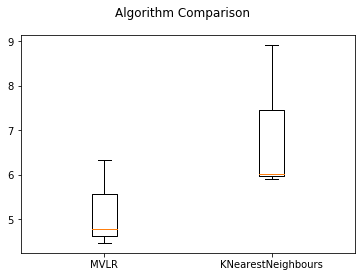

In [24]:

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [25]:
## doubt :- orange line is mean or median
## how to plot variance (width of box )and bais error from this

In [26]:
import statsmodels.api as sm
from statsmodels.api import add_constant
Xc=sm.add_constant(X)
#  it is used in OLS only not in sklearn
model=sm.OLS(y,Xc).fit()
Xc.head()
## here one is the multiplication factor to Beta0
## doubt here in this table we have all the coefficients.. of 20 cols, it has cols rowwise as well

C:\Users\kaveri\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,Type,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,...,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
1,1.0,0,25,31,0,0,1,1.8,140,6300,...,1,13.2,1,177,102,68,37,26.5,11.0,2705
2,1.0,5,18,25,2,0,2,3.2,200,5500,...,1,18.0,1,195,115,71,38,30.0,15.0,3560
3,1.0,1,20,26,1,0,2,2.8,172,5500,...,1,16.9,1,180,102,67,37,28.0,14.0,3375
4,1.0,5,19,26,2,0,2,2.8,172,5500,...,1,21.1,4,193,106,70,37,31.0,17.0,3405
5,1.0,5,22,30,1,2,1,3.5,208,5700,...,1,21.1,0,186,109,69,39,27.0,13.0,3640


In [27]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     16.86
Date:                Tue, 25 Feb 2020   Prob (F-statistic):           1.11e-19
Time:                        21:29:18   Log-Likelihood:                -261.58
No. Observations:                  93   AIC:                             565.2
Df Residuals:                      72   BIC:                             618.3
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 89.5120     26.213      3.415      0.001      37.258     141.766
Type                   1.0151      0.441      2.303      0.024       0.137       1.894
MPG.city              -0.1216      0.374     -0.325      0.746      -0.867       0.624
MPG.highway           -0.0682      0.363     -0.188      0.852      -0.792       0.656
AirBags                3.6764      0.871      4.221      0.000       1.940       5.413
DriveTrain             1.6293      0.809      2.013      0.048       0.016       3.242
Cylinders              0.8312      0.781      1.064      0.291      -0.726       2.389
EngineSize             1.0645      1.635      0.651      0.517      -2.195       4.324
Horsepower             0.1153      0.032      3.599      0.001       0.051       0.179
RPM                   -0.0014      0.002     -0.779      0.438      -0.005       0.002
Rev.per.mile           0.0021      0.002      1.026      0.309      -0.002       0.006
Man.trans.avail       -1.2616      1.755     -0.719      0.475      -4.761       2.238
Fuel.tank.capacity     0.1933      0.399      0.484      0.630      -0.602       0.989
Passengers            -0.1002      0.523     -0.192      0.848      -1.142       0.941
Length                -0.0003      0.081     -0.004      0.997      -0.161       0.161
Wheelbase              0.2660      0.210      1.270      0.208      -0.152       0.684
Width                 -1.5041      0.378     -3.975      0.000      -2.258      -0.750
Turn.circle           -0.6566      0.296     -2.219      0.030      -1.246      -0.067
Rear.seat.room         0.2524      0.286      0.884      0.380      -0.317       0.822
Luggage.room           0.1222      0.297      0.411      0.682      -0.470       0.714
Weight                 0.0006      0.004      0.155      0.877      -0.007       0.008
==============================================================================
Omnibus:                       25.166   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.046
Skew:                           0.899   Prob(JB):                     7.51e-15
Kurtosis:                       6.681   Cond. No.                     3.62e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.62e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

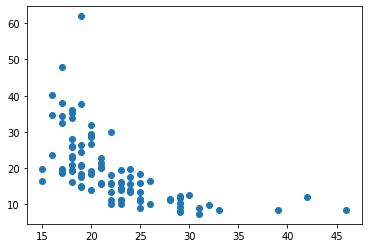

In [28]:
## why faetures having hogh p value are not consirede got eliminated-->WHY IT IS HAVING HIGH P VALUE:-
## CURVILINEAR PATTERN, doesnt have strong linear dependency,heteroscadesicity:- residual is not consistent /SSE IS NOT CONSISTENT
## Because of heteroscadesicity relationship it is rejecting this 
plt.scatter(df['MPG.city'],df['Price'])

In [29]:
## hence we will rejectinsignificant features and build model kfold again :-

# Model 2:- Creating model again with only 6 features after removing insignificant ones

In [30]:
X_new=X[['Type','AirBags','DriveTrain','Horsepower','Width']]

import statsmodels.api as sm
from statsmodels.api import add_constant
X_new_c=sm.add_constant(X_new)
model=sm.OLS(y,X_new_c).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     52.39
Date:                Tue, 25 Feb 2020   Prob (F-statistic):           8.50e-25
Time:                        21:29:19   Log-Likelihood:                -277.79
No. Observations:                  93   AIC:                             567.6
Df Residuals:                      87   BIC:                             582.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         54.3568     13.330      4.078      0.000      27.863      80.851
Type           1.7354      0.385      4.513      0.000       0.971       2.500
AirBags        2.8723      0.850      3.380      0.001       1.183       4.561
DriveTrain     2.1569      0.747      2.889      0.005       0.673       3.641
Horsepower     0.1183      0.014      8.341      0.000       0.090       0.147
Width         -0.8555      0.209     -4.102      0.000      -1.270      -0.441
==============================================================================
Omnibus:                       32.928   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.962
Skew:                           1.235   Prob(JB):                     9.66e-19
Kurtosis:                       6.912   Cond. No.                     4.33e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Now come to SKLEARN and lets c after adding significant feature , does the score improve..?


In [31]:
## Now all the features are passing the test

for name, model in models:
    
    kfold=model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
    cv_results = model_selection.cross_val_score(model, X_new, y,cv=kfold, scoring='neg_mean_squared_error') 
    results.append(np.sqrt(abs(cv_results)))
    names.append(name)
    print("%s: %f (%f)" % (name, np.mean(np.sqrt(np.abs(cv_results))),
                           np.var(np.sqrt(np.abs(cv_results)),ddof=1)))###(ddof=1,n-1)
    

MVLR: 5.586814 (1.059308)
KNearestNeighbours: 6.042591 (5.821123)


## Conclusion:-
### earlier also the score was :
#### MVLR: 5.196223 (0.981992)
#### KNearestNeighbours: 6.944202 (2.892567), doubt:-but R2 got decreased, which means i have more error in my model., is it..?
### model performance doesnt improve, not a great desisgn,:- bais  and variance increase( USING 6 FEATURES)
## independent variables with curvilinear relationship:- we will hogher order term for thses 2 feature and include in our model:- quadratic regression model(converting the highly coorelated ones to the quadratic one)

# MODEL 3: Quadratic Regression Model -(using polynomial features, using 2nd degree)

#### **** HOW WOULD YOU KNOW WHOCH ONES ARE THE CURVILINEAR FEATURES  ..?
##### Using pairplot

In [32]:
X_qr=X[['MPG.city','MPG.highway']]
X_std=sc.fit_transform(X_qr)

qr=PolynomialFeatures(degree=2)
XQR=qr.fit_transform(X_std)
XQR_df=pd.DataFrame(XQR)
XQR_2=XQR_df.drop([0],axis=1)
XQR_2.shape

(93, 5)

#### Now we will concatenate the XQR_df, and X_new (because XQR_df it has the higher oreder feature and X_new has the all significant features), for that we have to scale the the X_new

In [33]:
X_new_std=sc.fit_transform(X_new)
type(X_new_std)
## as X_new_std. is an array now convert it into dataframe
X_new_df=pd.DataFrame(X_new_std)

In [34]:
X_std[:3,:]

array([[ 0.47131249,  0.36092485],
       [-0.78103212, -0.77051373],
       [-0.42321938, -0.58194063]])

In [ ]:
### we got thsese 6 cols , interpretation of thses cols
### 1->MPGCITY, 2->HIGHWAY, 3->SQUARE(MPGCITY), 4->(HIGHWAY), 5->HIGHWAY*MPGCITY

In [35]:
X_final=pd.concat([X_new_df,XQR_2],axis=1)
X_final.head()

,0,1,2,3,4,1,2,3,4,5
0,-1.275407,-1.140297,-0.587083,-0.073484,-0.366184,0.471312,0.360925,0.222135,0.170108,0.130267
1,1.360434,1.687640,-0.587083,1.078322,0.431983,-0.781032,-0.770514,0.610011,0.601796,0.593691
2,-0.748239,0.273671,-0.587083,0.540813,-0.632239,-0.423219,-0.581941,0.179115,0.246289,0.338655
3,1.360434,1.687640,-0.587083,0.540813,0.165927,-0.602126,-0.581941,0.362555,0.350401,0.338655
4,1.360434,0.273671,2.012854,1.231897,-0.100128,-0.065407,0.172352,0.004278,-0.011273,0.029705


## Now pass the X_final in the validation loop

In [50]:
## Now all the features are passing the test

for name, model in models:
    
    kfold=model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
    cv_results = model_selection.cross_val_score(model, X_final, y,cv=kfold, scoring='neg_mean_squared_error') 
    results.append(np.sqrt(abs(cv_results)))
    names.append(name)
    print("%s: %f (%f)" % (name, np.mean(np.sqrt(np.abs(cv_results))),
                           np.var(np.sqrt(np.abs(cv_results)),ddof=1)))###(ddof=1,n-1)
    

MVLR: 5.373569 (1.542034)
KNearestNeighbours: 6.268537 (4.263259)


# MODEL 4: Quadratic Regression Model -(using polynomial features, using 3nd degree)

In [55]:
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
sc=StandardScaler()

qr=PolynomialFeatures(degree=3)
XQR=qr.fit_transform(X_std)
XQR_df=pd.DataFrame(XQR)
XQR_3=XQR_df.drop([0],axis=1)
XQR_3.shape
X_final=pd.concat([X_new_df,XQR_3],axis=1)


## 

for name, model in models:
    
    kfold=model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
    cv_results = model_selection.cross_val_score(model, X_final, y,cv=kfold, scoring='neg_mean_squared_error') 
    results.append(np.sqrt(abs(cv_results)))
    names.append(name)
    print("%s: %f (%f)" % (name, np.mean(np.sqrt(np.abs(cv_results))),
                           np.var(np.sqrt(np.abs(cv_results)),ddof=1)))###(ddof=1,n-1)
    

MVLR: 5.948997 (0.413776)
KNearestNeighbours: 6.360171 (3.294896)


In [ ]:
## Model 1 ( USING all 21 FEATURES)

MVLR: 5.196223 (0.981992)-->less var error
KNearestNeighbours: 6.944202 (2.892567) -->High var error

## Model 2 ( USING 6 FEATURES)

MVLR: 5.586814 (1.059308)
KNearestNeighbours: 6.042591 (5.821123)

## Model 3

QYADRATIC: 5.373569 (1.542034)--> as model complexity(using polynomial feature with degree 2) increases Bais error decreases, but variance error increases
KNearestNeighbours: 6.268537 (4.263259)

### As we saw that the bais error decreases, now lets increase the 3 rd order if by increasing the 3rd order bais error will increase, then we will remove it, but first lets c with the 3 rd order

## Model 4

QYADRATIC: 5.948997 (0.413776)
KNearestNeighbours: 6.360171 (3.294896)-->
    
    
### generally in theory with , model complexity our variance error increases but here we see that bais error increases,     
percentage difference:- BAIS ->(5.948997-5.373569)9.6 %
                        Variance--> 73.16 %
BECAUSE , POLYNOMIAL FEATURE(3 RD DEGREE) WHAT WE HAVE FITTED HERE IS NOT OVERFIT , IT IS RIGHTLY FIT
FOR LINEAR IT IS OVERFIT, BUT 3 RD FOR THE FOR CURVILINEAR 
    
THAT IS WHY VARIANCE ERROR DECREASED  DRASTICALLY, WITH TRADE OFF 9.6 % WITH 73% BENEFIT 

### Hence so far Polynomial Regression is best with Degress 3, 3rd power

# Lets use other Regressor Models (KNN,DECISION TREE, RANDOM FOREST)


In [40]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import GridSearchCV


# MODEL 1 : KNeighborsRegressor

In [36]:
knn=KNeighborsRegressor()
knn_params={'n_neighbors':np.arange(3,20), 'weights':['uniform','distance'] }
GS=GridSearchCV(knn,knn_params,cv=3,scoring='neg_mean_squared_error')

In [37]:
X_scaled=sc.fit_transform(X)

X_scaled.shape
GS.fit(X_scaled,y)

GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [38]:
GS.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

# MODEL 2 : DecisionTreeRegressor

In [41]:
DT=DecisionTreeRegressor(random_state=0)
DT_params={'max_depth':np.arange(1,50),'min_samples_leaf':np.arange(2,15)}

GS_DT=GridSearchCV(DT,DT_params,cv=3,scoring='neg_mean_squared_error')


In [42]:
GS_DT.fit(X_scaled,y)
GS_DT.best_params_

{'max_depth': 4, 'min_samples_leaf': 7}

# MODEL 3 : RandomForestRegressor

In [ ]:
### note for RandomForestRegressor,boosting , bagging for n_estimator  
grid search will not used because , grid search will give the average and bais error
n_estimator: depends on variance error not on bais error
n_estimator:-bagging , boosting and gradient

In [43]:
rmse_mean = []
rmse_var = []
for ne in np.arange(1,50):c
    kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
    mse = model_selection.cross_val_score(RF, X_scaled, y,cv=kfold, scoring='neg_mean_squared_error')
    rmse_mean.append(np.mean(np.sqrt(np.abs(mse))))
    rmse_var.append(np.var(np.sqrt(np.abs(mse))))


In [44]:

print(np.argmin(rmse_var))
print(min(rmse_var))
print(rmse_mean[1])

0
0.5564596767442489
6.972201681974728


In [45]:

print(np.argmin(rmse_mean))
print(min(rmse_mean))
print(rmse_var[31])

31
5.860718646346167
2.2898176164231057


### it indicates :- one estimatore RF is best perfor,ance
your random tree performance is equal to regularised performance
creating RF WITH ONE ESTIMATOR IS EQUIVALENT TO ONE DECISION TREE 
NO POINT in CREATING RF 



## PURPOSE OF n_estimator:-

## 2 goals:- 
more reliable ,less variance error, but only to certain point, too much will confuse, for what value o n+estimator we will get global minima
## Hence best estimator for RF is:
## we took n_estimator is 1 is why ...?
## where as 31 showed 
### n_estimators=1 suffers high bais but give good variance error, whereas,

### n_estimators=31 suffers high variance but give good bais  error, whereas,
### purpose of boosting:- single RF exhibits high bais error, when we do boostng for n_estimator =1 , 
### hence we should do base etimator 1 in adaboostar (which minimizes the bais error) , and lets c how much it reduces the bais error from 6.9(where variance is low as 0.55, but high bais error), not wise to choose the nestimator=31

# boxplot algorithm comparison

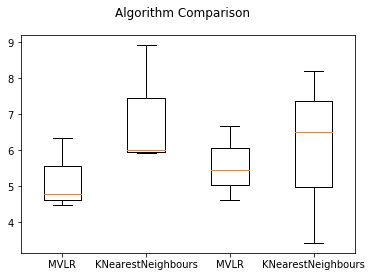

In [47]:

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [48]:

models=[]
results=[]
names=[]
models.append(('KNearestNeighbours',KNN))
models.append(('DecisionTreeRegressor',DT))
models.append(('RandomForestRegressor',RF))


for name, model in models:
    
    kfold=model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
    cv_results = model_selection.cross_val_score(model, X_scaled, y,cv=kfold, scoring='neg_mean_squared_error') 
    results.append(np.sqrt(abs(cv_results)))
    names.append(name)
    print("%s: %f (%f)" % (name, np.mean(np.sqrt(np.abs(cv_results))),
                           np.var(np.sqrt(np.abs(cv_results)),ddof=1)))###(ddof=1,n-1)
    
    
    
KNearestNeighbours: 6.082606 (3.399802)
DecisionTreeRegressor: 6.306883 (2.476063)
RandomForestRegressor: 5.748318 (3.213660)
    

KNearestNeighbours: 6.352923 (5.173775)
DecisionTreeRegressor: 6.658348 (6.396210)
RandomForestRegressor: 5.959704 (3.246679)


##  MODEL 4 : AdaBoostRegressor RF n_estimators=1 

In [50]:
RF=RandomForestRegressor(criterion='mae',n_estimators=1,random_state=0)
rmse_mean = []
rmse_var = []
for ne in np.arange(1,100):
    AB_RF=AdaBoostRegressor(base_estimator=RF,n_estimators=ne,random_state=0)
    kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
    mse = model_selection.cross_val_score(AB_RF, X_scaled, y,cv=kfold, scoring='neg_mean_squared_error')
    rmse_mean.append(np.mean(np.sqrt(np.abs(mse))))
    rmse_var.append(np.var(np.sqrt(np.abs(mse))))


In [51]:
print(np.argmin(rmse_var))
print(min(rmse_var))


0
1.2868918703778183


In [53]:

print(np.argmin(rmse_mean))
print(min(rmse_mean))

8
5.512971225315951

8
5.512971225315951


In [ ]:
## HENCE WE SAW THAT THE BAISED ERROR WAS DROPPED FROM 6... TO 5.51 HENCE WE WILL FEEZE THE adaboostRF FOR N_ESTIMATOR=9

## # MODEL 5 : AdaBoostRegressor (AdaBoost uses Decision Tree Classifier as default Classifier. base_estimator)

In [62]:
AB_dt=AdaBoostRegressor(n_estimators=100,random_state=0)
rmse_mean = []
rmse_var = []

for ne in np.arange(1,50):
    AB_dt=AdaBoostRegressor(n_estimators=ne,random_state=0)
    kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
    mse = model_selection.cross_val_score(AB_dt, X_scaled, y,cv=kfold, scoring='neg_mean_squared_error')
    rmse_mean.append(np.mean(np.sqrt(np.abs(mse))))
    rmse_var.append(np.var(np.sqrt(np.abs(mse))))


In [63]:


print(np.argmin(rmse_var))
print(min(rmse_var))



print(np.argmin(rmse_mean))
print(min(rmse_mean))

## as we got 19 scores for rmse , now we have to see which one is the least . so graphically we cannt make a conlusion ,
## so we willincraese the value at arange and Xaxis to 50, to see if the global minima value changes

43
1.4899097813884883
19
5.491770040203729


In [66]:
print(rmse_mean[43])
print(rmse_var[19])

6.231868029420608
1.8882475650148054


## To check the GLOBAL MINIMA POINT

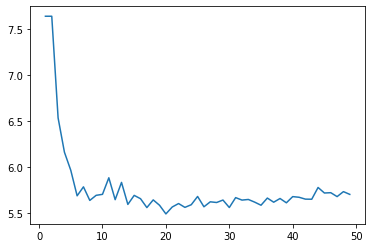

In [57]:
x_axis=np.arange(1,50)
plt.plot(x_axis,rmse)

####  so for AdaBoostRegressor we have best estimator as 20 and graphically

##  MODEL 7 : GradientBoost ()

In [64]:
rmse_mean = []
rmse_var = []


for ne in np.arange(1,50):
    
    
    AB_RF_GB=GradientBoostingRegressor(n_estimators=ne,random_state=0)
    kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
    mse = model_selection.cross_val_score(AB_RF_GB, X_scaled, y,cv=kfold, scoring='neg_mean_squared_error')
    #RMSE.append(np.var(np.sqrt(np.abs(mse)),ddof=1))
    rmse_mean.append(np.mean(np.sqrt(np.abs(mse))))
    rmse_var.append(np.var(np.sqrt(np.abs(mse))))


print(np.argmin(rmse_var))
print(min(rmse_var))



print(np.argmin(rmse_mean))
print(min(rmse_mean))

48
1.535037877129822
21
6.20977277846593


In [65]:
print(rmse_mean[48])
print(rmse_var[21])

6.249071463866014
1.9345357849816371


In [69]:
X_scaled.shape

(93, 20)

In [ ]:
KNN = KNeighborsRegressor(n_neighbors=3,weights='distance')
DT = DecisionTreeRegressor(max_depth= 5 ,min_samples_leaf=7 ,random_state=0,criterion='mae')
RF=RandomForestRegressor(criterion='mae',n_estimators=1,random_state=0)
AB_RF=AdaBoostRegressor(base_estimator=RF,n_estimators=9,random_state=0)
AB_dt=AdaBoostRegressor(n_estimators=20,random_state=0)
AB_RF_GB=AdaBoostRegressor(n_estimators=22,random_state=0)